In [1]:
from rmp import RMPRoot, RMPTree, RMPNode
from rmp_leaf import NaiveCollisionAvoidance, CollisionAvoidance, GoalAttractorUni, Damper
import numpy as np
from numpy.linalg import norm
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from IPython.display import HTML
from rmp_util import obstacle, scene, policy_evaluator, policy_evaluator2

# Play here

In [2]:
x_g = np.array([-1, 2.6])
x_o = np.array([0, -0.3])
x_o2 = np.array([0, 0])
x = np.array([2.5, -3.2])
x_dot = np.array([-1, 2])

test_scene = scene(goal=x_g, obstacle=[obstacle(x_o, 1)], x=x, x_dot=x_dot)

r = RMPRoot('Root')
Cave = CollisionAvoidance('collision_avoidance', r, None, 
                           epsilon=0.2, alpha=0, c=test_scene.obstacle[0].c, 
                           R=test_scene.obstacle[0].r)

NCave = NaiveCollisionAvoidance('naive_collision_avoidance', r, None, c=test_scene.obstacle[0].c,
                               R=test_scene.obstacle[0].r, alpha=0)

Gaoi = GoalAttractorUni('goal_attractor', r, test_scene.goal)

Damp = Damper('Damper', NCave, eta=10)

task failed, goal has not achieved
step cost None


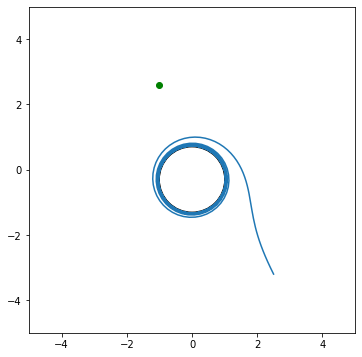

In [3]:
tree = RMPTree(root=r, nodes=[Cave])
pe = policy_evaluator2(test_scene, tree, np.linspace(0,30,300))
# Plot!!!
fig, axes = plt.subplots(figsize=(6,6))
ani = pe.plot(fig, axes)
print('step cost', pe.step_cost())

In [4]:
# print('step cost', pe.step_cost())
# fig, axes = plt.subplots(figsize=(5,5))
# ani = pe.video(fig, axes, frames=300)
# HTML(ani.to_html5_video())

In [5]:
tree = RMPTree(root=r, nodes=[NCave])
pe = policy_evaluator2(test_scene, tree, np.linspace(0,30,300))

/home/Cyan/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
print('step cost', pe.step_cost())
fig, axes = plt.subplots(figsize=(5,5))
pe.plot(fig, axes)
#ani = pe.video(fig, axes, frames=300)
#HTML(ani.to_html5_video())

# Notes
- the robot may be struggled under the summation dynamics


### Matplot Lab

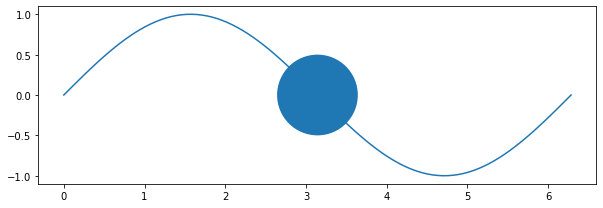

In [6]:
fig, axes = plt.subplots(figsize=(10,10))

x = np.linspace(0, 2*np.pi, 100)
axes.plot(x, np.sin(x))
circle = plt.Circle((np.pi, 0), 0.5)
axes.add_artist(circle)
axes.set_aspect('equal')


In [6]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('grade3')